Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
boroughs=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Boroughs_london.csv',index_col=0)

In [3]:
boroughs

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude
0,E09000001,City of London,Inner London,8800,5326,51.5155,-0.0922
1,E09000002,Barking and Dagenham,Outer London,209000,78188,51.5607,0.1557
2,E09000003,Barnet,Outer London,389600,151423,51.6252,-0.1517
3,E09000004,Bexley,Outer London,244300,97736,51.4549,0.1505
4,E09000005,Brent,Outer London,332100,121048,51.5588,-0.2817
5,E09000006,Bromley,Outer London,327900,140602,51.4039,0.0198
6,E09000007,Camden,Inner London,242500,107654,51.5290,-0.1255
7,E09000008,Croydon,Outer London,386500,159010,51.3714,-0.0977
8,E09000009,Ealing,Outer London,351600,132663,51.5130,-0.3089
9,E09000010,Enfield,Outer London,333000,130328,51.6538,-0.0799


Read file with List of neighbourhoods

In [4]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [5]:
neighbourhoods

,Borough,Neighbourhood,Latitude,Longitude
0,Barking and Dagenham,Rush Green,51.565500,0.176000
1,Barking and Dagenham,Marks Gate,51.586369,0.134848
2,Barking and Dagenham,Becontree Heath,51.563595,0.152614
3,Barking and Dagenham,Becontree,51.548700,0.142700
4,Barking and Dagenham,Barking,51.540000,0.080000
...,...,...,...,...
563,Westminster,Millbank,51.491500,-0.129500
564,Westminster,Maida Vale,51.527400,-0.189900
565,Westminster,St James's,51.508500,-0.133000
566,Westminster,Covent Garden,51.512874,-0.122544


In [6]:
neighbourhoods.shape

(563, 4)

In [7]:

London_neig_venues=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_borough_neig_venues.csv",index_col=0)


Let's check how many venues were returned for each neighborhood

In [8]:
London_neig_venues.head(10)

,Borough,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue category,Venue Category
0,Barking and Dagenham,Rush Green,51.565500,0.176000,Co-op Food,51.565820,0.175966,Grocery Store,shops
1,Barking and Dagenham,Rush Green,51.565500,0.176000,BP,51.565801,0.176862,Gas Station,shops
2,Barking and Dagenham,Rush Green,51.565500,0.176000,Costa Coffee,51.568029,0.180212,Coffee Shop,food
3,Barking and Dagenham,Rush Green,51.565500,0.176000,Lynne Davis Wedding and Events,51.565908,0.178294,Flower Shop,shops
4,Barking and Dagenham,Rush Green,51.565500,0.176000,Go Shop,51.568454,0.180030,Convenience Store,shops
5,Barking and Dagenham,Marks Gate,51.586369,0.134848,Co-op Food,51.584313,0.135648,Grocery Store,shops
6,Barking and Dagenham,Marks Gate,51.586369,0.134848,The Crooked Billet,51.587311,0.130429,Dive Bar,nightlife
7,Barking and Dagenham,Becontree Heath,51.563595,0.152614,Iceland,51.560578,0.147685,Grocery Store,shops
8,Barking and Dagenham,Becontree Heath,51.563595,0.152614,Shell,51.560415,0.148364,Gas Station,shops
9,Barking and Dagenham,Becontree Heath,51.563595,0.152614,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center,building


In [9]:
London_neig_venues.groupby('Neighbourhood').count()

,Borough,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue category,Venue Category
Neighbourhood,,,,,,,,
Abbey Wood,4,4,4,4,4,4,4,4
Acton,20,20,20,20,20,20,20,20
Addington,4,4,4,4,4,4,4,4
Addiscombe,12,12,12,12,12,12,12,12
Albany Park,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...
Woolwich,28,28,28,28,28,28,28,28
Worcester Park,18,18,18,18,18,18,18,18
Wormwood Scrubs,5,5,5,5,5,5,5,5


DERIVED CATEBORIES FROM FOURSQUARE ['Venue Category']

Let's find out how many unique categories can be curated from all the returned venues

In [10]:
print('There are {} uniques categories.'.format(len(London_neig_venues['Venue Category'].unique())))

There are 9 uniques categories.


In [11]:
print(London_neig_venues['Venue Category'].unique())

['shops' 'food' 'nightlife' 'building' 'parks_outdoors' 'travel'
 'arts_entertainment' 'education' 'event']


Analize each neighbourhood

In [12]:
# one hot encoding
London_neig_onehot = pd.get_dummies(London_neig_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_neig_onehot['Neighbourhood'] = London_neig_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [London_neig_onehot.columns[-1]] + list(London_neig_onehot.columns[:-1])
London_neig_onehot = London_neig_onehot[fixed_columns]

London_neig_onehot.head()


,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Rush Green,0,0,0,0,0,0,0,1,0
1,Rush Green,0,0,0,0,0,0,0,1,0
2,Rush Green,0,0,0,0,1,0,0,0,0
3,Rush Green,0,0,0,0,0,0,0,1,0
4,Rush Green,0,0,0,0,0,0,0,1,0


Examine the dataframe size

In [13]:
London_neig_onehot.shape

(12462, 10)

USING FREQUENCY MEAN OF CATEGORY OCCURRENCE

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [14]:
heat_map_neig=London_neig_onehot.groupby('Neighbourhood').sum().reset_index()
heat_map_neig.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/heat_map_neig.xlsx')

In [15]:
London_neig_grouped_mean = London_neig_onehot.groupby('Neighbourhood').mean().reset_index()
London_neig_grouped_mean


,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.500000,0.000000
1,Acton,0.0,0.0,0.0,0.0,0.200000,0.000000,0.100000,0.300000,0.400000
2,Addington,0.0,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.250000,0.500000
3,Addiscombe,0.0,0.0,0.0,0.0,0.500000,0.000000,0.250000,0.250000,0.000000
4,Albany Park,0.0,0.0,0.0,0.0,0.250000,0.250000,0.000000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...
510,Woolwich,0.0,0.0,0.0,0.0,0.500000,0.071429,0.035714,0.357143,0.035714
511,Worcester Park,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.666667,0.000000
512,Wormwood Scrubs,0.2,0.2,0.0,0.0,0.000000,0.000000,0.400000,0.000000,0.200000
513,Yeading,0.0,0.0,0.0,0.0,0.000000,0.250000,0.000000,0.500000,0.250000


Let's confirm new size

In [16]:
London_neig_grouped_mean.shape

(515, 10)

In [17]:
London_neig_grouped_mean.to_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv')

Let's print each neighbourhood with the 10 most common venues

In [18]:

def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [19]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Abbey Wood----
                venue  freq
0      parks_outdoors   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Acton----
                venue  freq
0              travel   0.4
1               shops   0.3
2                food   0.2
3      parks_outdoors   0.1
4  arts_entertainment   0.0


----Addington----
                venue  freq
0              travel  0.50
1                food  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Addiscombe----
                venue  freq
0                food  0.50
1      parks_outdoors  0.25
2               shops  0.25
3  arts_entertainment  0.00
4            building  0.00


----Albany Park----
                venue  freq
0                food  0.25
1           nightlife  0.25
2               shops  0.25
3              travel  0.25
4  arts_entertainment  0.00


----Aldborough Hatch----
                venue  freq
0      

                venue  freq
0                food  0.45
1           nightlife  0.16
2               shops  0.12
3              travel  0.12
4  arts_entertainment  0.07


----Botany Bay----
                venue  freq
0                food  0.33
1           nightlife  0.33
2               shops  0.33
3  arts_entertainment  0.00
4            building  0.00


----Bounds Green----
                venue  freq
0                food  0.33
1           nightlife  0.20
2               shops  0.20
3              travel  0.13
4  arts_entertainment  0.07


----Bow----
                venue  freq
0                food  0.52
1               shops  0.26
2           nightlife  0.22
3  arts_entertainment  0.00
4            building  0.00


----Bowes Park----
            venue  freq
0            food  0.42
1       nightlife  0.17
2          travel  0.17
3        building  0.08
4  parks_outdoors  0.08


----Brent Cross----
                venue  freq
0               shops  0.54
1                food  0.40

4            building  0.00


----Colindale----
                venue  freq
0                food   0.4
1               shops   0.4
2            building   0.1
3      parks_outdoors   0.1
4  arts_entertainment   0.0


----Collier Row----
                venue  freq
0      parks_outdoors   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Colliers Wood----
                venue  freq
0               shops  0.57
1                food  0.21
2              travel  0.14
3           nightlife  0.07
4  arts_entertainment  0.00


----Colney Hatch----
                venue  freq
0                food  0.33
1               shops  0.33
2      parks_outdoors  0.22
3            building  0.11
4  arts_entertainment  0.00


----Colyers----
                venue  freq
0               shops   0.8
1                food   0.2
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Coney Hall----
    

4  parks_outdoors  0.03


----Enfield Wash----
            venue  freq
0            food  0.47
1           shops  0.27
2       nightlife  0.13
3        building  0.07
4  parks_outdoors  0.07


----Erith----
            venue  freq
0           shops  0.45
1            food  0.27
2        building  0.09
3  parks_outdoors  0.09
4          travel  0.09


----Falconwood----
                venue  freq
0               shops  0.75
1                food  0.25
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Feltham----
                venue  freq
0               shops  0.60
1              travel  0.20
2                food  0.13
3  arts_entertainment  0.07
4            building  0.00


----Finchley----
                venue  freq
0                food  0.75
1            building  0.25
2  arts_entertainment  0.00
3           education  0.00
4               event  0.00


----Finsbury----
                venue  freq
0                food  0.53
1           

4           shops  0.11


----Hanwell----
                venue  freq
0      parks_outdoors   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Hanworth----
            venue  freq
0            food  0.29
1  parks_outdoors  0.29
2        building  0.14
3       nightlife  0.14
4           shops  0.14


----Harefield----
                venue  freq
0                food   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Harlesden----
            venue  freq
0            food  0.40
1           shops  0.30
2          travel  0.20
3       nightlife  0.05
4  parks_outdoors  0.05


----Harlington----
       venue  freq
0       food  0.33
1     travel  0.22
2  nightlife  0.17
3      shops  0.17
4   building  0.06


----Harmondsworth----
            venue  freq
0       nightlife  0.33
1            food  0.22
2          travel  0.22
3  parks_outdoors  0

4  arts_entertainment  0.08


----Lamorbey----
                venue  freq
0               shops   0.4
1  arts_entertainment   0.2
2           nightlife   0.2
3      parks_outdoors   0.2
4            building   0.0


----Lampton----
                venue  freq
0                food   0.4
1  arts_entertainment   0.2
2           nightlife   0.2
3              travel   0.2
4            building   0.0


----Lea Bridge----
                venue  freq
0      parks_outdoors  0.62
1               shops  0.25
2           nightlife  0.12
3  arts_entertainment  0.00
4            building  0.00


----Leamouth----
                venue  freq
0                food  0.43
1      parks_outdoors  0.29
2            building  0.14
3               shops  0.14
4  arts_entertainment  0.00


----Leaves Green----
                venue  freq
0           nightlife  0.50
1              travel  0.33
2      parks_outdoors  0.17
3  arts_entertainment  0.00
4            building  0.00


----Lee----
                ve

                venue  freq
0               shops  0.67
1      parks_outdoors  0.33
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----North Finchley----
                venue  freq
0                food  0.48
1               shops  0.32
2              travel  0.10
3           nightlife  0.06
4  arts_entertainment  0.03


----North Harrow----
            venue  freq
0            food  0.38
1        building  0.25
2  parks_outdoors  0.12
3           shops  0.12
4          travel  0.12


----North Kensington----
            venue  freq
0           shops  0.33
1        building  0.17
2            food  0.17
3  parks_outdoors  0.17
4          travel  0.17


----North Sheen----
                venue  freq
0               shops  0.54
1            building  0.23
2                food  0.23
3  arts_entertainment  0.00
4           education  0.00


----North Woolwich----
                venue  freq
0              travel   0.6
1                food   0.4
2 

4              travel  0.08


----Rush Green----
                venue  freq
0               shops   0.8
1                food   0.2
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Ruxley----
                venue  freq
0                food   0.6
1      parks_outdoors   0.2
2               shops   0.2
3  arts_entertainment   0.0
4            building   0.0


----Sanderstead----
                venue  freq
0  arts_entertainment  0.33
1                food  0.33
2      parks_outdoors  0.33
3            building  0.00
4           education  0.00


----Sands End----
            venue  freq
0            food  0.34
1          travel  0.22
2  parks_outdoors  0.12
3       nightlife  0.10
4           shops  0.10


----Selhurst----
            venue  freq
0            food  0.47
1          travel  0.26
2       nightlife  0.11
3           shops  0.11
4  parks_outdoors  0.05


----Selsdon----
                venue  freq
0                food   0.5
1      

4            building  0.00


----Sundridge----
                venue  freq
0                food  0.50
1  arts_entertainment  0.25
2              travel  0.25
3            building  0.00
4           education  0.00


----Surbiton----
       venue  freq
0       food  0.53
1      shops  0.18
2  nightlife  0.16
3     travel  0.08
4   building  0.02


----Surrey Quays----
                venue  freq
0                food  0.36
1               shops  0.36
2              travel  0.10
3  arts_entertainment  0.05
4            building  0.05


----Sutton----
       venue  freq
0      shops  0.52
1       food  0.31
2  nightlife  0.10
3   building  0.03
4     travel  0.03


----Swiss Cottage----
                venue  freq
0                food  0.51
1               shops  0.26
2              travel  0.12
3  arts_entertainment  0.04
4      parks_outdoors  0.04


----Sydenham (also Lower Sydenham, Upper Sydenham)----
                venue  freq
0                food  0.46
1               shops  0

4  arts_entertainment  0.02


----West Ham----
                venue  freq
0                food  0.57
1            building  0.14
2      parks_outdoors  0.14
3              travel  0.14
4  arts_entertainment  0.00


----West Hampstead----
                venue  freq
0                food  0.67
1               shops  0.11
2  arts_entertainment  0.07
3           nightlife  0.07
4            building  0.04


----West Harrow----
                venue  freq
0               shops   0.4
1                food   0.2
2      parks_outdoors   0.2
3              travel   0.2
4  arts_entertainment   0.0


----West Hendon----
                venue  freq
0               shops  0.33
1              travel  0.33
2                food  0.25
3      parks_outdoors  0.08
4  arts_entertainment  0.00


----West Kensington----
                venue  freq
0                food  0.57
1               shops  0.13
2           nightlife  0.10
3              travel  0.10
4  arts_entertainment  0.07


----West Norwood

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [21]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [22]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [23]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbey Wood,shops,parks_outdoors,travel,nightlife,food
1,Acton,travel,shops,food,parks_outdoors,nightlife
2,Addington,travel,shops,food,parks_outdoors,nightlife
3,Addiscombe,food,shops,parks_outdoors,travel,nightlife
4,Albany Park,travel,shops,nightlife,food,parks_outdoors


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [24]:
neighbourhoods_venues_sorted.shape

(515, 6)

In [25]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [26]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.500000,0.000000
1,0.0,0.0,0.0,0.0,0.200000,0.000000,0.100000,0.300000,0.400000
2,0.0,0.0,0.0,0.0,0.250000,0.000000,0.000000,0.250000,0.500000
3,0.0,0.0,0.0,0.0,0.500000,0.000000,0.250000,0.250000,0.000000
4,0.0,0.0,0.0,0.0,0.250000,0.250000,0.000000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...
510,0.0,0.0,0.0,0.0,0.500000,0.071429,0.035714,0.357143,0.035714
511,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.666667,0.000000
512,0.2,0.2,0.0,0.0,0.000000,0.000000,0.400000,0.000000,0.200000
513,0.0,0.0,0.0,0.0,0.000000,0.250000,0.000000,0.500000,0.250000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [27]:
SSD = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

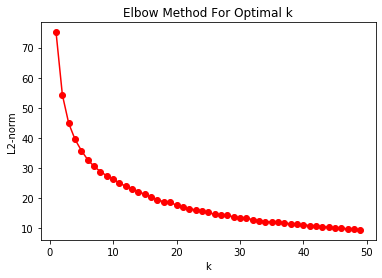

9.392913470874031

In [28]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [29]:

elbow_N10=np.empty([49,2])
elbow_N10=pd.DataFrame(elbow_N10,columns=['K','SSD'])
elbow_N10['K']=K
elbow_N10['SSD']=SSD
elbow_N10.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N10.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 10 clusters.

In [30]:
# set number of clusters
kclusters = 10

In [31]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([2, 7, 7, 0, 7, 4, 4, 9, 0, 7, 0, 9, 0, 8, 3, 7, 0, 9, 9, 1, 1, 2,
       9, 8, 5, 9, 0, 0, 0, 6, 6, 2, 6, 4, 0, 2, 0, 0, 6, 9, 5, 0, 0, 8,
       1, 6, 2, 4, 4, 1, 7, 0, 9, 1, 9, 0, 9, 1, 4, 9, 6, 9, 9, 4, 7, 2,
       4, 5, 5, 0, 0, 9, 9, 0, 4, 0, 1, 4, 8, 9, 5, 1, 2, 0, 9, 1, 9, 0,
       4, 6, 7, 0, 9, 2, 8, 4, 0, 4, 4, 9, 0, 1, 2, 6, 1, 6, 1, 0, 6, 0,
       5, 0, 0, 1, 6, 2, 0, 9, 9, 2, 4, 6, 5, 5, 8, 9, 6, 0, 0, 9, 9, 8,
       9, 8, 2, 5, 9, 9, 9, 1, 0, 1, 0, 1, 0, 1, 7, 4, 0, 0, 9, 0, 4, 7,
       1, 8, 0, 7, 1, 0, 1, 6, 6, 4, 9, 1, 4, 1, 0, 3, 9, 4, 0, 4, 0, 9,
       0, 0, 4, 4, 1, 4, 5, 9, 1, 9, 0, 9, 0, 9, 0, 9, 2, 9, 2, 9, 1, 1,
       0, 4, 1, 5, 9, 9, 2, 5, 0, 1, 9, 8, 0, 0, 1, 4, 1, 0, 5, 0, 7, 6,
       1, 5, 9, 1, 9, 6, 9, 9, 0, 9, 9, 1, 0, 0, 5, 4, 1, 7, 0, 1, 0, 7,
       8, 5, 8, 9, 7, 9, 1, 4, 0, 4, 8, 5, 1, 9, 9, 1, 1, 0, 0, 1, 9, 2,
       9, 3, 9, 8, 0, 6, 1, 1, 0, 5, 0, 0, 9, 2, 9, 0, 9, 1, 2, 4, 8, 1,
       0, 8, 1, 4, 1, 5, 9, 3, 9, 1, 9, 5, 2, 1, 0,

In [32]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [33]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N10=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N10=kclusters_N10.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [34]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighbourhoods.loc[neighbourhoods.Neighbourhood.isin(neighbourhoods_venues_sorted.Neighbourhood.values)]
# merge London_neig_grouped with to add latitude/longitude for each Neighbourhood
London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
175,Kingston upon Thames,Coombe,51.371305,-0.101957,0,food,shops,nightlife,travel,building
438,Newham,Forest Gate,51.550832,0.027390,0,food,shops,travel,nightlife,parks_outdoors
189,Croydon,Selsdon,51.345300,-0.053500,0,shops,food,travel,parks_outdoors,nightlife
190,Croydon,Old Coulsdon,51.301800,-0.114300,0,shops,food,travel,parks_outdoors,nightlife
192,Croydon,Addiscombe,51.381000,-0.066300,0,food,shops,parks_outdoors,travel,nightlife


Finally, let's visualize the resulting clusters

In [35]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [36]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [37]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_neig_clusters_CATEGORY.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [38]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [39]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
175,Kingston upon Thames,Coombe,51.371305,-0.101957,0,food,shops,nightlife,travel,building
438,Newham,Forest Gate,51.550832,0.027390,0,food,shops,travel,nightlife,parks_outdoors
189,Croydon,Selsdon,51.345300,-0.053500,0,shops,food,travel,parks_outdoors,nightlife
190,Croydon,Old Coulsdon,51.301800,-0.114300,0,shops,food,travel,parks_outdoors,nightlife
192,Croydon,Addiscombe,51.381000,-0.066300,0,food,shops,parks_outdoors,travel,nightlife
...,...,...,...,...,...,...,...,...,...,...
43,Barnet,Cricklewood,51.554800,-0.217600,0,food,shops,travel,nightlife,parks_outdoors
70,Bexley,Ruxley,51.413100,0.136400,0,food,shops,parks_outdoors,travel,nightlife
71,Bromley,Ruxley,51.413100,0.136400,0,food,shops,parks_outdoors,travel,nightlife
45,Camden,Cricklewood,51.554800,-0.217600,0,food,shops,travel,nightlife,parks_outdoors


In [40]:
 print ('CLuster 2: ')

CLuster 2: 


In [41]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
530,Wandsworth,Nine Elms,51.480000,-0.140000,1,food,shops,nightlife,travel,building
236,Greenwich,Eltham,51.451000,0.052000,1,shops,food,nightlife,arts_entertainment,travel
237,Greenwich,Charlton,51.487674,0.038992,1,shops,food,travel,parks_outdoors,arts_entertainment
417,Lewisham,Catford,51.445200,-0.020700,1,food,shops,travel,nightlife,arts_entertainment
240,Greenwich,Well Hall,51.457030,0.049200,1,food,shops,travel,parks_outdoors,building
...,...,...,...,...,...,...,...,...,...,...
112,Bromley,West Wickham,51.376500,-0.019300,1,shops,food,parks_outdoors,nightlife,travel
173,Croydon,South Norwood,51.398095,-0.076822,1,food,travel,shops,parks_outdoors,nightlife
441,Newham,East Ham,51.532300,0.055400,1,shops,food,parks_outdoors,nightlife,building
440,Newham,Silvertown,51.500000,0.030000,1,shops,travel,parks_outdoors,food,nightlife


In [42]:
print ('Cluster 3: ')

Cluster 3: 


In [43]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
418,Lewisham,Chinbrook,51.431600,0.031400,2,arts_entertainment,shops,parks_outdoors,event,travel
6,Redbridge,Chadwell Heath,51.575700,0.144000,2,parks_outdoors,shops,nightlife,travel,food
77,Bexley,Blackfen,51.450800,0.092550,2,shops,travel,parks_outdoors,nightlife,food
397,Lambeth,Tulse Hill,51.445200,-0.109100,2,parks_outdoors,travel,shops,nightlife,food
444,Redbridge,Snaresbrook,51.587027,0.014563,2,shops,parks_outdoors,travel,nightlife,food
411,Lewisham,Bellingham,51.431100,-0.024500,2,shops,travel,parks_outdoors,building,nightlife
201,Ealing,Hanwell,51.518900,-0.337600,2,shops,parks_outdoors,travel,nightlife,food
138,Bromley,Bromley Common,51.384100,0.034900,2,shops,parks_outdoors,travel,nightlife,food
2,Barking and Dagenham,Becontree Heath,51.563595,0.152614,2,shops,parks_outdoors,travel,food,building
445,Waltham Forest,Snaresbrook,51.587027,0.014563,2,shops,parks_outdoors,travel,nightlife,food


In [44]:
print('Cluster 4: ')

Cluster 4: 


In [45]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==3,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
305,Havering,Noak Hill,51.61900,0.23270,3,parks_outdoors,travel,shops,nightlife,food
202,Ealing,West Ealing,51.51898,-0.31498,3,parks_outdoors,food,travel,shops,nightlife
36,Barnet,Arkley,51.64770,-0.23110,3,parks_outdoors,travel,shops,nightlife,food
321,Hillingdon,Northwood,51.60100,-0.41760,3,parks_outdoors,building,arts_entertainment,travel,shops
409,Southwark,Sydenham Hill,51.43290,-0.06900,3,parks_outdoors,nightlife,travel,shops,food
485,Southwark,Nunhead,51.46220,-0.05080,3,parks_outdoors,nightlife,travel,shops,food
408,Lewisham,Sydenham Hill,51.43290,-0.06900,3,parks_outdoors,nightlife,travel,shops,food
247,Hackney,Lea Bridge,51.56210,-0.04560,3,parks_outdoors,shops,nightlife,travel,food
172,Croydon,Forestdale,51.34500,-0.03800,3,parks_outdoors,nightlife,travel,shops,food
241,Greenwich,Middle Park,51.44500,0.04000,3,parks_outdoors,travel,shops,nightlife,food


In [46]:
print('Cluster 5:')

Cluster 5:


In [47]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==4,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
454,Redbridge,Wanstead,51.577792,0.028589,4,food,shops,nightlife,parks_outdoors,travel
287,Harrow,Stanmore,51.618000,-0.314000,4,food,shops,nightlife,travel,parks_outdoors
288,Harrow,Rayners Lane,51.573700,-0.373500,4,food,shops,nightlife,travel,parks_outdoors
198,Ealing,Bedford Park,51.500099,-0.261699,4,food,travel,shops,parks_outdoors,nightlife
543,Westminster,Westminster,51.494722,-0.135278,4,food,shops,nightlife,travel,building
327,Hillingdon,Uxbridge,51.540400,-0.477800,4,food,building,travel,shops,parks_outdoors
13,Barnet,Edgware,51.618500,-0.272900,4,food,shops,travel,parks_outdoors,nightlife
450,Redbridge,Woodford Green,51.605000,0.020000,4,food,building,arts_entertainment,travel,shops
97,Brent,Brent Park,51.551965,-0.260300,4,food,shops,travel,parks_outdoors,nightlife
355,Islington,St Luke's,51.525000,-0.093000,4,food,nightlife,shops,building,travel


In [48]:
print('Cluster 6: ')

Cluster 6: 


In [49]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==5,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
337,Hounslow,Hanworth,51.431000,-0.381000,5,parks_outdoors,food,shops,nightlife,building
328,Hillingdon,Cowley,51.528000,-0.481000,5,nightlife,parks_outdoors,food,travel,shops
503,Tower Hamlets,Isle of Dogs,51.491000,-0.015000,5,parks_outdoors,food,travel,shops,nightlife
502,Tower Hamlets,Millwall,51.488661,-0.018589,5,parks_outdoors,food,travel,nightlife,shops
379,Kingston upon Thames,Berrylands,51.393000,-0.287000,5,travel,parks_outdoors,building,shops,nightlife
9,Barking and Dagenham,Castle Green,51.533328,0.122395,5,arts_entertainment,parks_outdoors,nightlife,travel,shops
269,Hammersmith and Fulham,Wormwood Scrubs,51.521380,-0.240439,5,parks_outdoors,travel,building,arts_entertainment,shops
40,Barnet,Brunswick Park,51.626000,-0.148000,5,travel,parks_outdoors,food,shops,nightlife
180,Croydon,Woodside,51.387077,-0.065331,5,parks_outdoors,travel,food,shops,nightlife
209,Enfield,Bulls Cross,51.678150,-0.059325,5,parks_outdoors,nightlife,arts_entertainment,travel,shops


In [50]:
print('Cluster 7: ')

Cluster 7: 


In [51]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==6,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
452,Redbridge,Newbury Park,51.576700,0.086200,6,shops,travel,parks_outdoors,nightlife,food
520,Waltham Forest,Highams Park,51.605900,-0.015100,6,shops,travel,building,parks_outdoors,nightlife
496,Sutton,Beddington,51.373400,-0.124100,6,shops,food,building,travel,parks_outdoors
427,Merton,Colliers Wood,51.419100,-0.167700,6,shops,food,travel,nightlife,parks_outdoors
473,Richmond upon Thames,North Sheen,51.474778,-0.278421,6,shops,food,building,travel,parks_outdoors
428,Merton,Raynes Park,51.403300,-0.232100,6,shops,travel,food,parks_outdoors,nightlife
432,Newham,Beckton,51.514600,0.067300,6,shops,travel,nightlife,building,parks_outdoors
382,Sutton,Worcester Park,51.375200,-0.239000,6,shops,food,travel,parks_outdoors,nightlife
381,Kingston upon Thames,Worcester Park,51.375200,-0.239000,6,shops,food,travel,parks_outdoors,nightlife
0,Barking and Dagenham,Rush Green,51.565500,0.176000,6,shops,food,travel,parks_outdoors,nightlife


In [52]:
print('Cluster 8: ')

Cluster 8: 


In [53]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==7,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
329,Hillingdon,Ickenham,51.558000,-0.448400,7,travel,shops,parks_outdoors,nightlife,food
80,Bexley,Slade Green,51.468000,0.189000,7,travel,shops,food,parks_outdoors,nightlife
82,Brent,Tokyngton,51.547600,-0.277000,7,travel,shops,food,parks_outdoors,nightlife
458,Redbridge,Seven Kings,51.567610,0.097910,7,travel,shops,nightlife,food,parks_outdoors
233,Greenwich,Plumstead,51.486990,0.079810,7,travel,nightlife,food,shops,parks_outdoors
455,Redbridge,Redbridge,51.576000,0.052000,7,travel,shops,nightlife,food,parks_outdoors
222,Enfield,Enfield Lock,51.668600,-0.026000,7,travel,parks_outdoors,food,shops,nightlife
110,Bromley,Elmstead,51.415500,0.050100,7,travel,shops,parks_outdoors,nightlife,food
218,Enfield,Arnos Grove,51.616300,-0.128600,7,travel,parks_outdoors,food,shops,nightlife
517,Tower Hamlets,Bromley (also Bromley-by-Bow),51.526631,-0.017232,7,travel,shops,nightlife,food,building


In [54]:
print('Cluster 9: ')

Cluster 9: 


In [55]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==8,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
133,Bromley,Keston,51.362500,0.027100,8,travel,nightlife,shops,parks_outdoors,food
472,Richmond upon Thames,St Margarets,51.460000,-0.320000,8,nightlife,food,arts_entertainment,travel,shops
343,Hounslow,Isleworth,51.466000,-0.336000,8,travel,nightlife,food,building,shops
306,Havering,Emerson Park,51.574100,0.230400,8,building,travel,shops,parks_outdoors,nightlife
26,Barnet,New Barnet,51.648784,-0.172913,8,nightlife,travel,building,shops,parks_outdoors
377,Kingston upon Thames,Malden Rushett,51.336769,-0.320285,8,shops,nightlife,travel,parks_outdoors,food
1,Barking and Dagenham,Marks Gate,51.586369,0.134848,8,shops,nightlife,travel,parks_outdoors,food
479,Richmond upon Thames,Twickenham,51.449000,-0.337000,8,nightlife,food,building,travel,shops
497,Sutton,Carshalton,51.365200,-0.167600,8,nightlife,travel,shops,food,parks_outdoors
311,Havering,Ardleigh Green,51.583300,0.216500,8,nightlife,shops,building,travel,parks_outdoors


In [56]:
print('Cluster 10: ')

Cluster 10: 


In [57]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==9,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
482,Southwark,Denmark Hill,51.467800,-0.090200,9,food,nightlife,shops,travel,parks_outdoors
481,Southwark,Bermondsey,51.498600,-0.075700,9,food,nightlife,parks_outdoors,shops,arts_entertainment
113,Bromley,Widmore (also Widmore Green),51.402396,0.035160,9,food,nightlife,shops,parks_outdoors,building
480,Southwark,Bermondsey,51.498600,-0.075700,9,food,nightlife,parks_outdoors,shops,arts_entertainment
493,Southwark,Camberwell,51.473600,-0.091200,9,food,nightlife,travel,shops,arts_entertainment
...,...,...,...,...,...,...,...,...,...,...
431,Newham,West Ham,51.534700,0.007690,9,food,travel,parks_outdoors,building,shops
433,Newham,Custom House,51.507600,0.029700,9,food,travel,parks_outdoors,nightlife,arts_entertainment
194,Ealing,Northolt,51.547000,-0.362000,9,food,travel,parks_outdoors,building,shops
224,Enfield,Winchmore Hill,51.633941,-0.101003,9,food,travel,nightlife,shops,parks_outdoors


In [58]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N10=np.empty([kclusters,2])                                         
Centroids_N10=pd.DataFrame(Centroids_N10, columns=['x-Latitude','y-Longitude']) 
Centroids_N10['x-Latitude']=x
Centroids_N10['y-Longitude']=y
Centroids_N10.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N10.xlsx')

In [59]:
Centroids_N10

,x-Latitude,y-Longitude
0,51.517571,-0.128811
1,51.506984,-0.074737
2,51.494707,0.018729
3,51.506678,-0.096338
4,51.519973,-0.140358
5,51.490497,-0.118085
6,51.474436,-0.046303
7,51.493348,-0.149429
8,51.465403,-0.048716
9,51.508422,-0.132406


In [60]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4,5,6,7,8,9
arts_entertainment,0,1,1,0,0,1,0,0,0,0
building,0,0,0,0,0,0,0,0,1,0
education,0,0,0,0,0,0,0,0,0,0
event,0,0,0,0,0,0,0,0,0,0
food,124,22,0,0,58,2,0,3,0,113
nightlife,0,0,0,0,0,1,0,0,14,4
parks_outdoors,0,0,9,10,0,19,0,0,0,0
shops,7,63,18,0,0,0,36,0,5,0
travel,0,0,0,0,0,7,0,32,5,0


In [61]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N10=kclusters_N10.append(p_score)

In [62]:
kclusters_N10.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N10.xlsx')
kclusters_N10

0     120.000000
1      81.000000
2      25.000000
3       9.000000
4      54.000000
5      30.000000
6      34.000000
7      32.000000
8      23.000000
9     107.000000
10      0.175377
11      0.875899
dtype: float64